In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os
from tqdm import tqdm

In [4]:
data = np.array([
    [0.000103, 0.000846, 0.017366, 0.181574],
    [0.000555, 0.006125, 0.044396, 0.413093],
    [0.000518, 0.005058, 0.043199, 0.374945],
    [0.000029, 0.001715, 0.003285, 0.035864],
    [0.001772, 0.025511, 1.492746, 5.599526]
])

data2 = np.array([
    [0.000103, 0.000846, 0.017366, 0.181574],
    [0.000555, 0.006125, 0.044396, 0.413093],
    [0.000518, 0.005058, 0.043199, 0.374945],
    [0.000029, 0.001715, 0.003285, 0.035864],
    [0.000046, 0.001159, 0.005349, 0.048135]
])

labels = [
    "MLX",
    "Tyxml",
    "Tyxml percent",
    "Dream html",
    "Dream eml"
]

volume = np.array([
    1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000
])
# volumes = np.array([
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000]
# ])

colors = ['b', 'g', 'r', 'c', 'm']

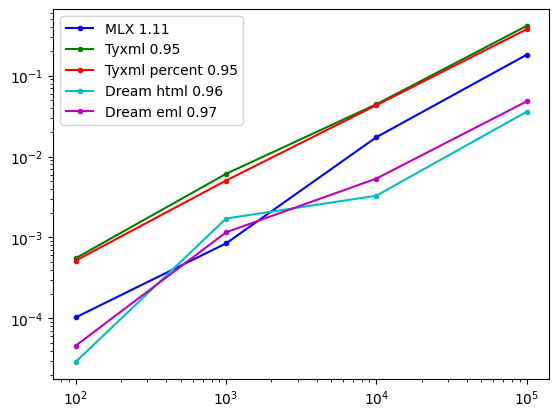

In [5]:
def graph_perfomance(data, labels, volumes, colors):
    plt.yscale('log')
    plt.xscale('log')
    for i in range(0, 5):
        k, _ = np.polyfit(np.log(volumes[i]), np.log(data[i]), deg=1)
        plt.plot(volumes[i], data[i], marker=".", color=colors[i], label=f'{labels[i]} {k:.2f}')
    plt.legend()
    plt.savefig('perfomance.png')
    plt.show()

graph_perfomance(data2, labels, volumes, colors)

In [12]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = [
    "Dream eml",
    "Dream html",
    "MLX",
    "Tyxml",
    "Tyxml percent"
]

volumes = np.array([
    1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000
])

In [22]:
MAX_RETIRES = 10

data = []
for epoch in tqdm(range(MAX_RETIRES)):
    proc = subprocess.run('eval $(opam env) && dune exec ../stress.exe',
                                    shell=True, cwd=os.getcwd(), capture_output=True)
    subdata = np.array(list(map(float, proc.stdout.decode('utf-8').split()))).reshape((len(volumes), 5)).T
    data.append(subdata)

data = np.array(data).mean(axis=0)

100%|██████████| 10/10 [03:10<00:00, 19.04s/it]


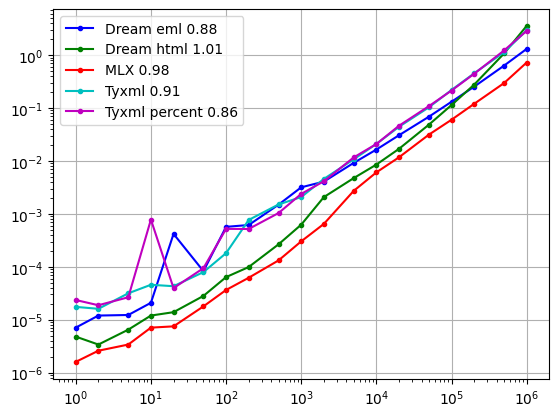

In [23]:

plt.yscale('log')
plt.xscale('log')
for color, label, d in zip(colors, labels, data):
    k, _ = np.polyfit(np.log(volumes), np.log(d), deg=1)
    plt.plot(volumes, d, marker=".", color=color, label=f'{label} {k:.2f}')
plt.legend()
plt.grid()
plt.savefig('perfomance.png')
plt.show()

# after changing to pool

In [15]:
MAX_RETIRES = 10

data = []
for epoch in tqdm(range(MAX_RETIRES)):
    proc = subprocess.run('eval $(opam env) && dune exec ../stress.exe',
                                    shell=True, cwd=os.getcwd(), capture_output=True)
    subdata = np.array(list(map(float, proc.stdout.decode('utf-8').split()))).reshape((len(volumes), 5)).T
    data.append(subdata)

data = np.array(data).mean(axis=0)

100%|██████████| 10/10 [02:56<00:00, 17.65s/it]


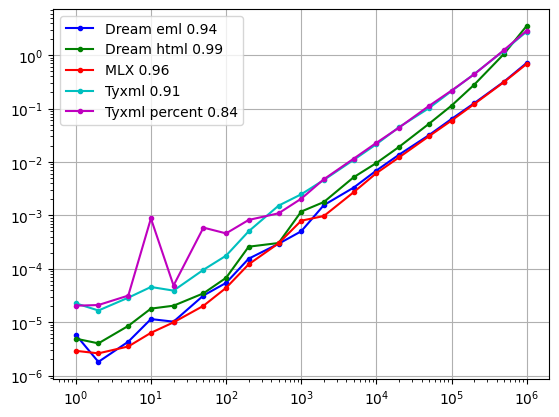

In [19]:
plt.yscale('log')
plt.xscale('log')
for color, label, d in zip(colors, labels, data):
    k, _ = np.polyfit(np.log(volumes), np.log(d), deg=1)
    plt.plot(volumes, d, marker=".", color=color, label=f'{label} {k:.2f}')
plt.legend()
plt.grid()
plt.savefig("improved.png")
plt.show()

In [3]:
MAX_RETIRES = 10

data = []
for epoch in tqdm(range(MAX_RETIRES)):
    proc = subprocess.run('eval $(opam env) && dune exec ../stress.exe',
                                    shell=True, cwd=os.getcwd(), capture_output=True)
    subdata = np.array(list(map(float, proc.stdout.decode('utf-8').split())))
    data.append(subdata)

data = np.array(data).mean(axis=0)

100%|██████████| 10/10 [10:20<00:00, 62.08s/it]


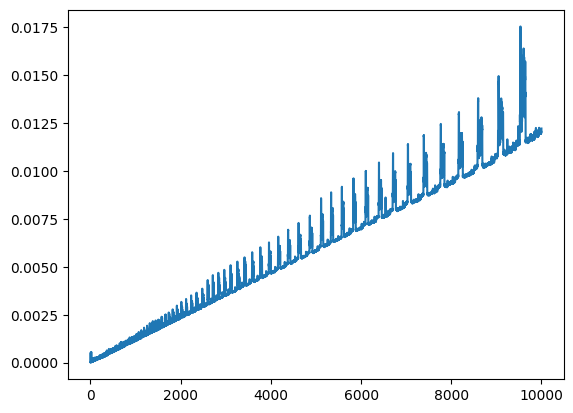

In [6]:
volumes = range(1, 10000)
plt.plot(volumes, data)

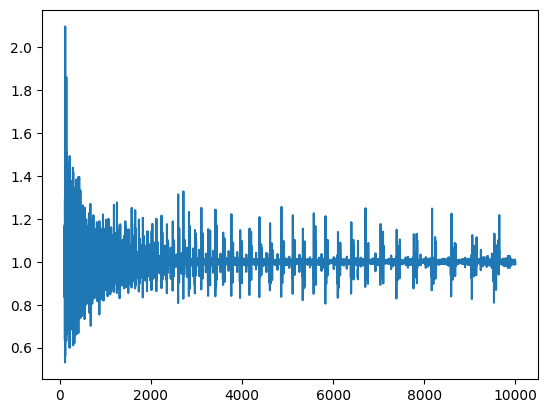

In [18]:
ind = 100
volumes = range(ind+1, 10000-1)
d = [y / x for x, y in zip(data[1:], data[:-1])][ind:]
plt.plot(volumes, d)